<center> Desafío - Gráficos y correlación
<center>Sandra Borotto

In [1]:

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv('nations.csv', encoding = "ISO-8859-1")
df.head(10)

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.00,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.20,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.20,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.20,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.10,33.299999
5,6,Cameroon,Africa,1986.800049,5.650000,127.800003,155.00,50.116665,18564118,56.366665,0.6532,NaN,0.75,NaN
6,7,Cape Verde,Africa,3052.199951,3.500000,81.599998,30.00,73.333336,484867,59.283333,0.6358,84.800003,2.15,NaN
7,8,Central African Rep,Africa,677.000000,3.383333,106.599998,173.50,45.933334,4203917,38.466667,0.8222,55.200001,0.20,NaN
8,9,Chad,Africa,1266.199951,1.500000,164.500000,209.00,48.566666,10509983,26.400000,0.8006,33.599998,0.10,NaN
9,10,Comoros,Africa,1099.000000,2.800000,58.000000,105.75,59.783333,688300,28.000000,0.8554,74.199997,0.40,NaN


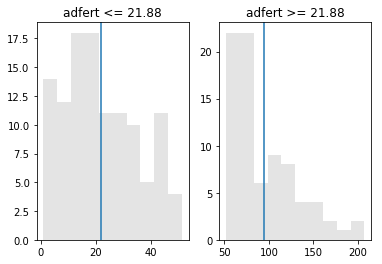

In [5]:
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))
    
binarize_histogram(df, 'adfert')

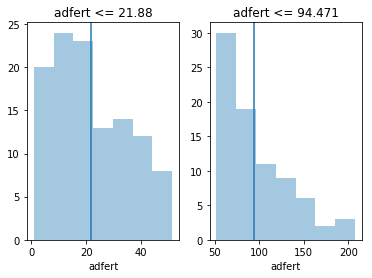

In [34]:
def binarize_histogram2(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    plt.subplot(1,2,1)
    sns.distplot(hist_0,kde=False).set_title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    plt.axvline(np.mean(hist_0))
    plt.subplot(1,2,2)
    sns.distplot(hist_1,kde=False).set_title("{0} <= {1}".format(variable, round(np.mean(hist_1), 3)))
    plt.axvline(np.mean(hist_1))
    
    
binarize_histogram2(df,'adfert')

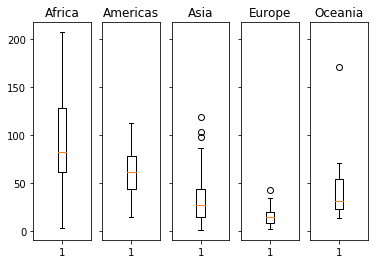

In [4]:
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        ax[i].boxplot(tmp[tmp[group_by] == n][variable])
        ax[i].set_title(n)
        
grouped_boxplot(df, 'adfert', 'region')

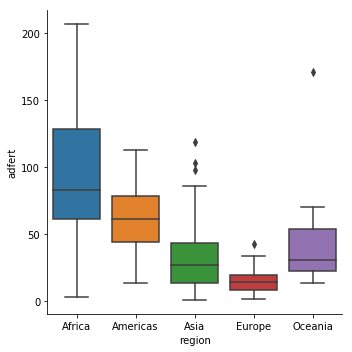

In [39]:
def grouped_boxplot2(dataframe, variable, group_by):
    sns.catplot(x = variable, y = group_by, data = dataframe, kind = "box")
    
grouped_boxplot2(df,"region","adfert")

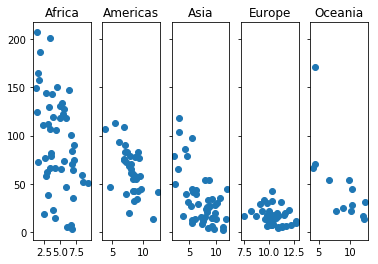

In [6]:
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)
        
grouped_scatterplot(df, 'school', 'adfert', 'region')

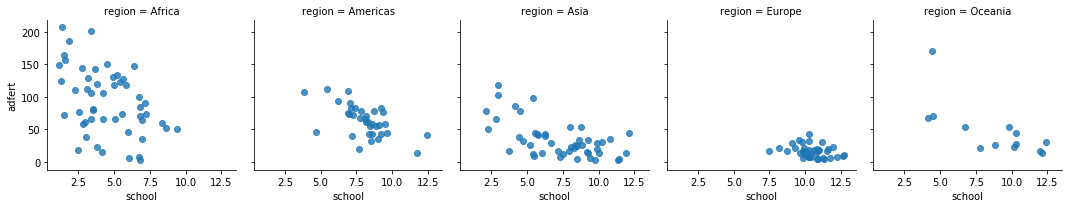

In [64]:
def grouped_scatterplot2(dataframe, x, y, group_by):
    sns.lmplot(x=x, y=y,col=group_by, data=dataframe,fit_reg=False,height=3)
    
grouped_scatterplot2(df,"school", "adfert","region")
    


Desafío 3

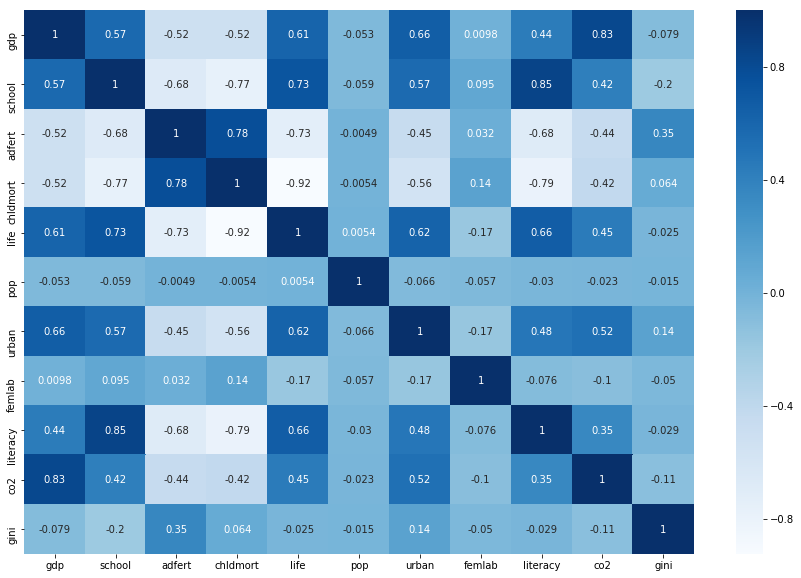

In [11]:
df_subset = df.loc[:,'country':'gini']
corr_mat = df_subset.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat, cmap='Blues',annot=True)


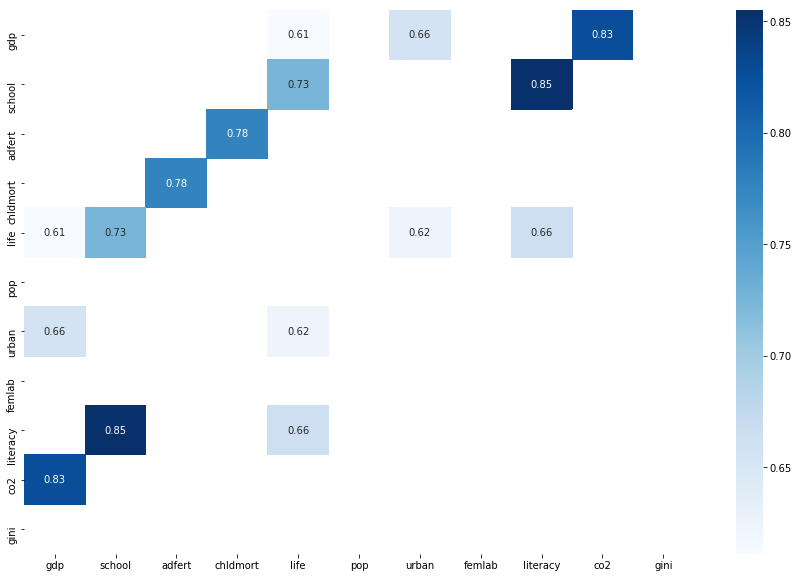

In [83]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat[(corr_mat>0.6 )&(corr_mat!=1)], cmap='Blues',annot=True)

Desafío 4

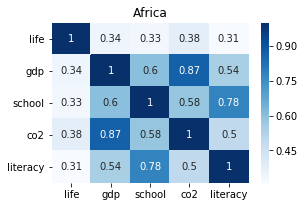

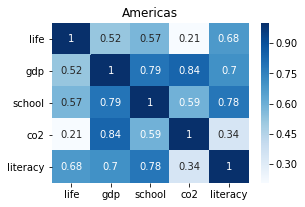

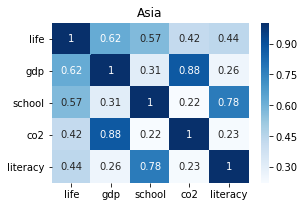

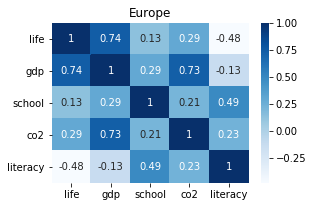

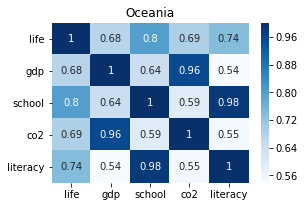

In [102]:
df_subset2= df.loc[:,['life','gdp','school','co2','literacy','region']]

def funcionheatmap(columna):
    df_subset2['tipo']=np.where(df_subset2['region']==columna,'True','False')
    df_subset3=df_subset2[(df_subset2['tipo']=='True')]
    corr_3=df_subset3.corr()
    sns.heatmap(corr_3, cmap='Blues',annot=True)
    plt.title(columna) 
    

listaregion=['Africa','Americas','Asia','Europe','Oceania']

for i ,j  in enumerate (listaregion): 
    plt.figure(figsize=(15,10))
    plt.subplot(3,3,i+1)
    funcionheatmap(j)


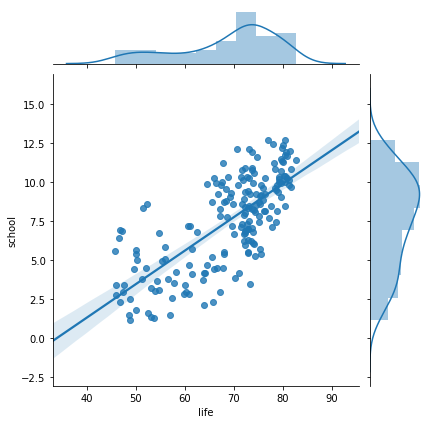

In [107]:
sns.jointplot(df_subset2['life'],df_subset2['school'], kind="reg")

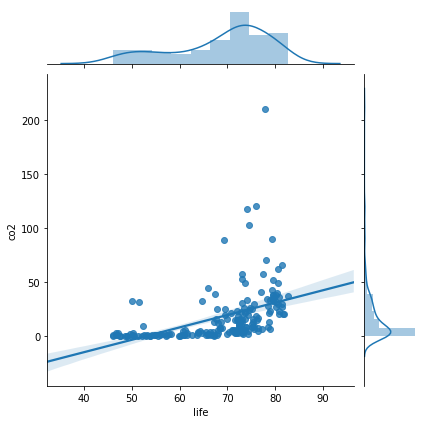

In [106]:
 sns.jointplot(df_subset2['life'],df_subset2['co2'], kind="reg")

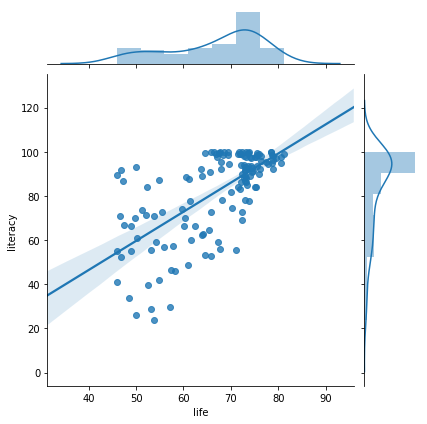

In [108]:
sns.jointplot(df_subset2['life'],df_subset2['literacy'], kind="reg")

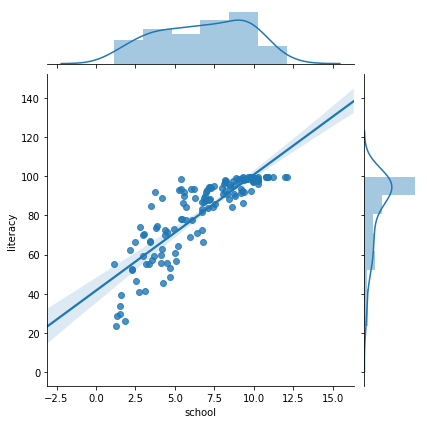

In [110]:
 sns.jointplot(df_subset2['school'],df_subset2['literacy'], kind="reg")


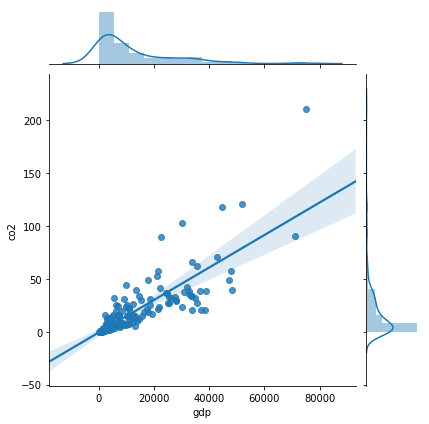

In [111]:
 sns.jointplot(df_subset2['gdp'],df_subset2['co2'], kind="reg")